In [157]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np

def my_round(val, digit=0):
    p = 10 ** digit
    return (val * p * 2 + 1) // 2 / p

def rss_calc(num_list, avr):
    rss = 0
    for num in num_list:
        rss = rss + (num - avr)**2
    return rss

def main():
    filename = 'two-px.xlsx'
    df = pd.read_excel(filename, sheet_name='select_opx')
    df = df.dropna(subset=['Temp'])
    df = df[ (df['Cation'] > 3.95) & (df['Cation'] < 4.05) & (df['Cation.1'] > 3.95) & (df['Cation.1'] < 4.05)]
    
    print(len(df))
    
    mgnum_opx = 100 * ( df['MgO.1'] / 40.3044 ) / ( ( df['FeO.1'] / 71.844 ) + ( df['MgO.1'] / 40.3044 ) )
    mgnum_opx = my_round(mgnum_opx).reset_index(drop=True)
    mgnum_min, mgnum_max = int(min(mgnum_opx)), int(max(mgnum_opx))
    tempc = df['Temp'].reset_index(drop=True)
    
    for index, mgnum in enumerate(list(range(mgnum_min, mgnum_max+1))):
        tempc_list = []
        for i in range(len(mgnum_opx)):
            if mgnum_opx[i] == mgnum:
                tempc_list.append(tempc[i])
            else:
                pass
            
        num_tempc_list = list(map(float, tempc_list))
        
        if len(num_tempc_list) == 0:
            print(mgnum)
        elif len(num_tempc_list) == 1:
            print(mgnum, num_tempc_list[0])
        else:
            avr = sum(num_tempc_list)/len(num_tempc_list)
            sigma = ( rss_calc(num_tempc_list, avr)  / ( (len(num_tempc_list) - 1) ) )**0.5
            print(mgnum, avr, sigma)

if __name__ == "__main__":
    main()

594
48 815.5049733362705
49
50
51
52
53
54 1199.7393694828588 340.29131647439743
55 949.6698740487034
56 966.8294262552084
57 1027.8034989190348 120.85212392882713
58 978.0442463595955 22.160472803735335
59 972.5948316854011 14.300510412786391
60 999.6739416831193 84.09068998488556
61 981.2354084704342 29.079376739224855
62 976.8068278976149 9.9296661367354
63 988.7470982163393 6.981903977527677
64 1012.0063250774152 31.83636592205204
65 995.4316073357841 8.189836816614068
66 993.5154110563159 6.080143451211267
67 992.9968679109201 3.8594886728771094
68 1010.4565599479596 9.85639537789296
69 1014.0010770596937 3.8733724454610465
70 1023.679228275819 18.08747046149936
71 1025.903452481889 2.9087831229703864
72 1049.0718996301914 5.959884669848737
73
74 1039.5766608781232


TempC = 4.118339942085365*mgnum + 732.3640836400413


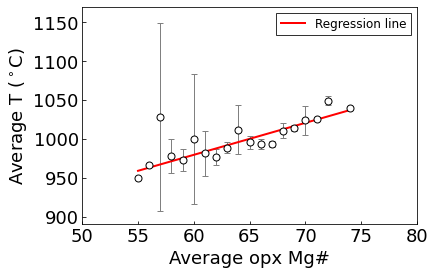

In [151]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model


filename = 'two-px.xlsx'
df = pd.read_excel(filename, sheet_name='mgnum-temp')

mgnum = df['Mg#'].values.tolist()
tempc = df['T'].values.tolist()
sigma = df['sigma'].values.tolist()

plt.rcParams["font.size"] = 18
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
fig = plt.figure( figsize=(6.0, 4.0) )

ax1 = fig.add_subplot(111)
#ax1.plot(x, mgnum, '--o', ms=3, mew=0.5, mfc='w', lw=0.5, mec='k', c='k')
ax1.errorbar(mgnum, tempc, yerr=sigma, capsize=3, fmt='o', ms=7, lw=1, markeredgecolor='k', c='k', mfc='w', ecolor='grey')
rob = linear_model.HuberRegressor(fit_intercept=True)
mgnum = np.array(mgnum).reshape(-1,1)
rob.fit(mgnum, tempc)
Te_rob_fit = rob.predict(mgnum)
ax1.plot(mgnum, Te_rob_fit, '-', label='Regression line', c='r', lw=2)
ax1.legend(fancybox=False, edgecolor='k', fontsize=12)

ax1.set_xlim(50, 80)
ax1.set_ylim(890, 1170)
ax1.set_xlabel('Average opx Mg#')
ax1.set_ylabel('Average T ($^\circ$C)')

print('TempC = '+str(rob.coef_[0])+'*mgnum + '+str(rob.intercept_))

plt.savefig('mgnum-temp.jpg', dpi=300, bbox_inches="tight")

